# First part: Comparison of classifiers on simulated data

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are two useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [2]:
def plot_dataset(X_train, y_train, X_test=None, y_test=None):
    # -- function that plots the datapoints
    h = 0.02 # -- h is the step length
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    if X_test is not None and y_test is not None:
        # -- Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
def plot_model(input_model, X_train, y_train, X_test, y_test):
    # -- function that plots the datapoints and decision boundaries of input_model
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)
    
    ax.set_title("Model decision boundary")
    # -- Plot the decision boundary. For that, we will assign a color to each
    # -- point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # -- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha = 0.8)

    # -- Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # -- Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "k", alpha = 0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [4]:
# -- generate a random n-classification dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# -- add noise to points exploiting a uniform distribution
# -- the aim is to get closer to a non-linearly separable dataset 
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training dataset.

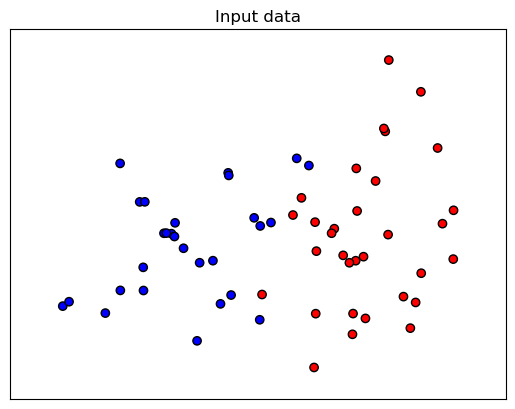

In [5]:
plot_dataset(X_train_scaled, y_train)

Let's now print all data (i.e., train and and test). The points in the test set are the most transparent that will be displayed.

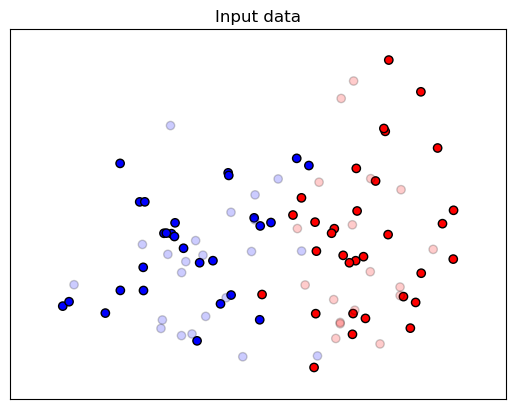

In [6]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the train error and the test error.

Training error:, 0.03333
Test error:, 0.05000


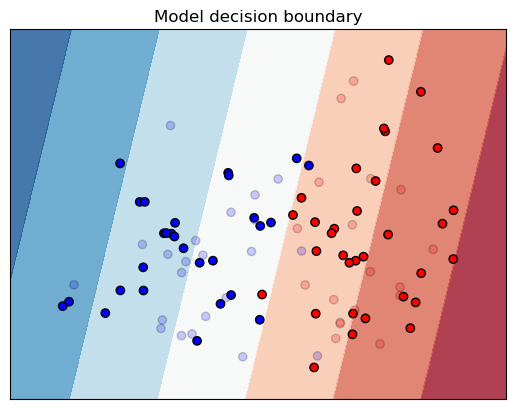

In [7]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error:, {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')

print(f'Test error:, {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's do the same for SVM.

Training error: 0.05000
Test error: 0.05000


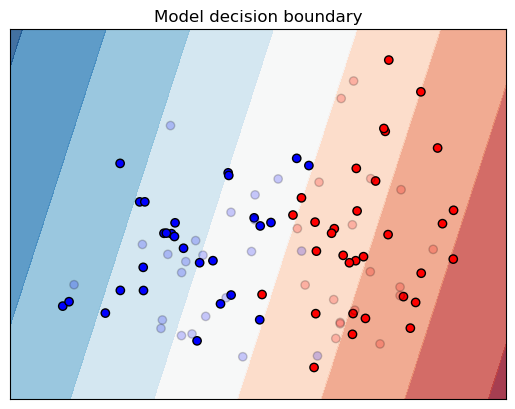

In [8]:
svm = SVC(kernel = "linear", C = 1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try with a NN.

Training error: 0.01667
Test error: 0.05000


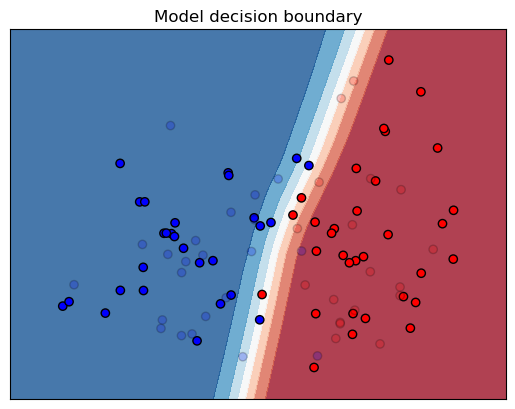

In [9]:
# -- one hidden layer with size= 100, activation function = ReLU (see documentation)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's try now with some more complex dataset.

In [10]:
X, y = make_moons(noise = 0.3, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

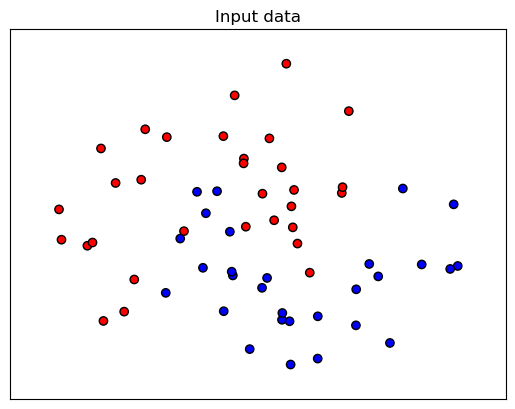

In [11]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

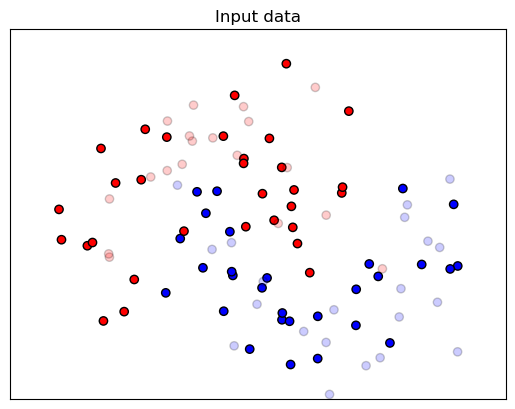

In [12]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error: 0.21667
Test error: 0.22500


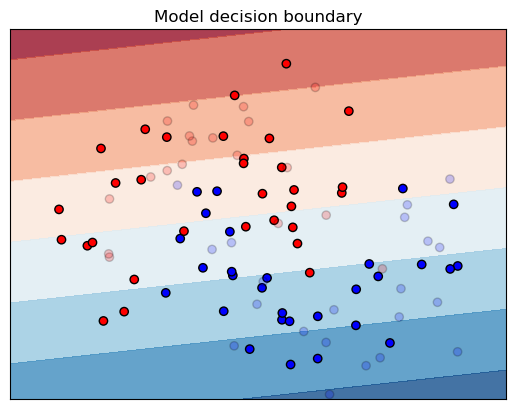

In [13]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.18333
Test error: 0.10000


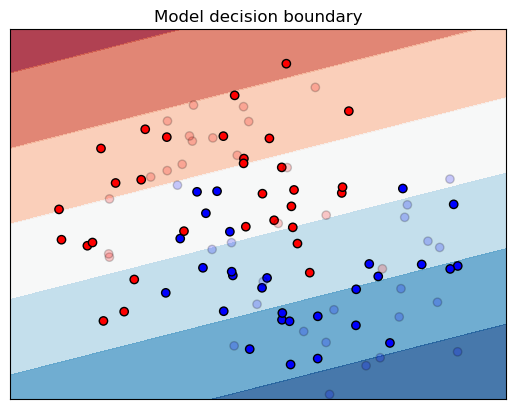

In [14]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try the NN

Training error: 0.01667
Test error: 0.05000


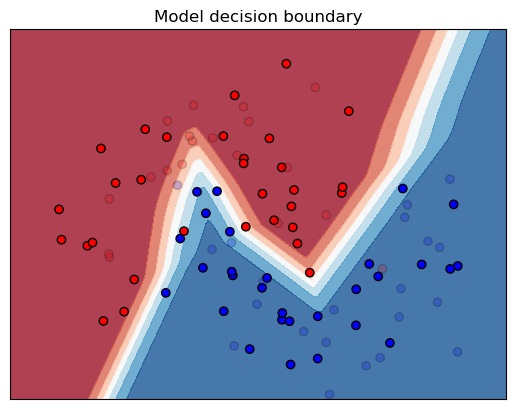

In [15]:
mlp = MLPClassifier(max_iter = 1500)
# -- Note that with max_iter = 1000 the model is not converging. (see 'tol' parameter). Try to re-train with max_iter = 1500
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Another interesting dataset

In [16]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

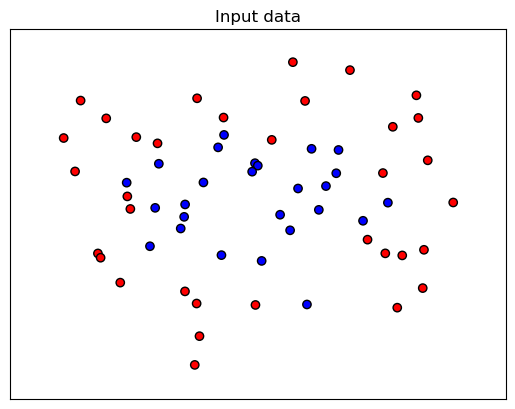

In [17]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

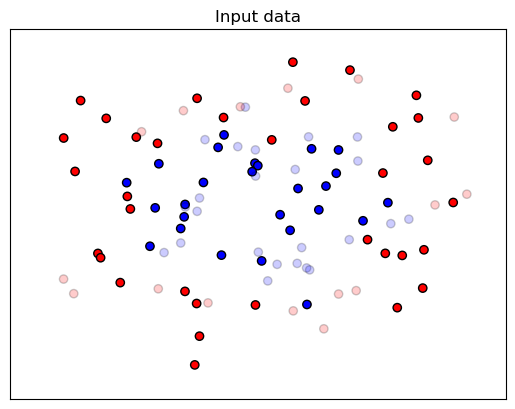

In [18]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron

Training error: 0.50000
Test error: 0.47500


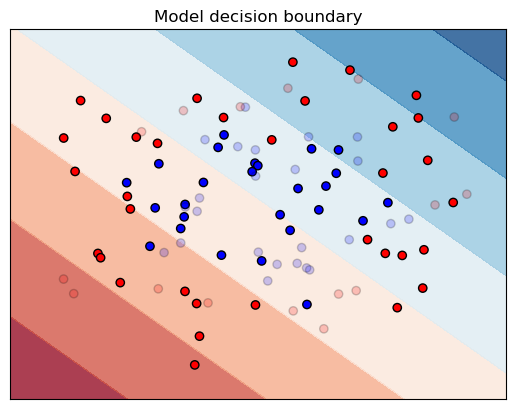

In [19]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.43333
Test error: 0.60000


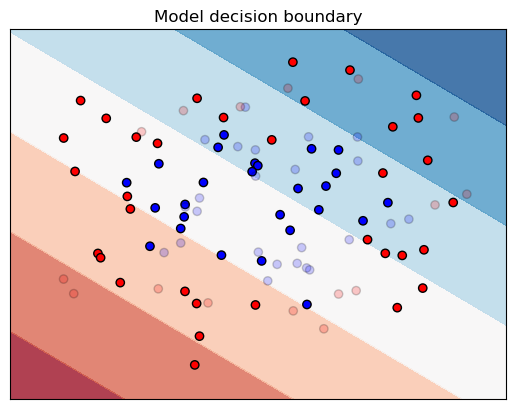

In [20]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's run the NN

Training error: 0.03333
Test error: 0.12500


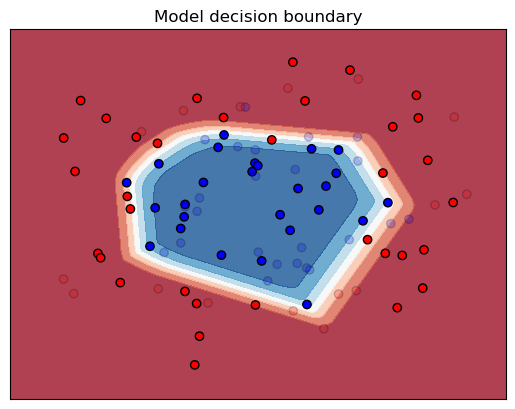

In [21]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's now consider the blobs dataset considered in the last Lab.

In [22]:
# -- make_blobs dataset

# -- generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# -- scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot all the data.

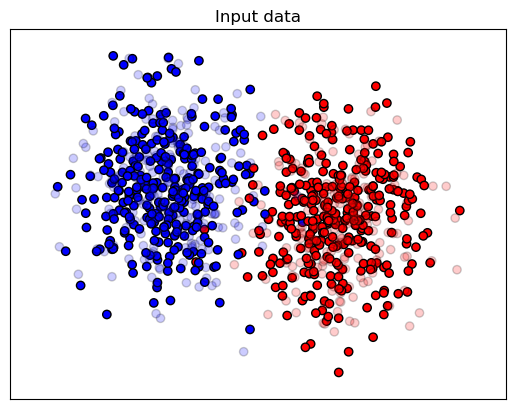

In [23]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Training error: 0.02833
Test error: 0.03750


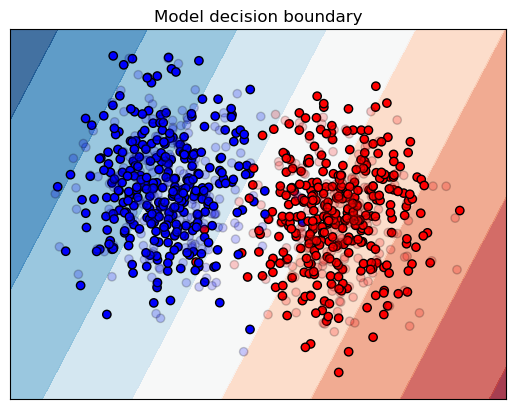

In [24]:
# -- perceptron
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Training error: 0.31667
Test error: 0.28500


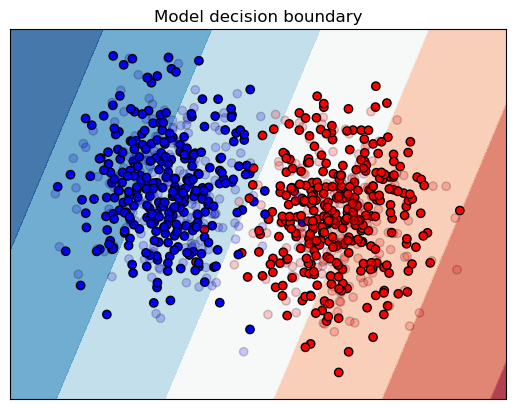

In [25]:
# -- svm
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Training error: 0.02000
Test error: 0.01500


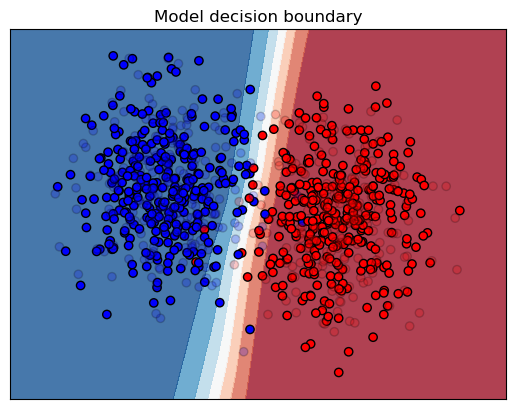

In [26]:
# -- NN (mlp)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

# Second part: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [27]:
# -- put here your ID_Number  (numero di matricola)
numero_di_matricola = 1 

In [28]:
#import all packages needed
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- avoid convergence warnings from sklearn library
import warnings
warnings.filterwarnings("ignore")

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [29]:
# -- load the dataset
df = pd.read_csv('kc_house_data.csv', sep = ',')
# -- remove the data samples with missing values (NaN)
df = df.dropna() 

# -- see features_explained.pdf (if you want)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [30]:
Data = df.values
# -- m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m, 2]
X = Data[:m, 3:]

Amount of data: 3164


## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $2/3$ of all samples, the one for choosing among different models will consist of $1/6$ of all samples, while the other part consists of the remaining $1/6$-th of all samples.

In [31]:
# -- Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

from sklearn.model_selection import train_test_split

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test/m, random_state = numero_di_matricola)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, 
                                                  test_size = m_val/(m_train + m_val), random_state = numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [32]:
# -- Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_and_val_scaled = scaler.transform(X_train_and_val)

## Neural Networks
Let's start by learning a simple neural network with 1 hidden node.
Note: we are going to use the input parameter solver='lbfgs' and random_state=numero_di_matricola to fix the random seed (so results are reproducible).

We hereby define a function to train an MLPRegressor on the (already scaled) training data and (optionally) print its parameters at the end of the training.

In [33]:
# -- look at kwargs** in Python

In [34]:
from sklearn.neural_network import MLPRegressor

def train_model(X_train, Y_train, X_val, Y_val, print_weights = True, **params):

    mlp_model = MLPRegressor(**params)
    mlp_model.fit(X_train, Y_train)

    # -- let's print the error (1 - R^2) on training data
    print(f'Training error: {(1.0 - mlp_model.score(X_train, Y_train)):.5f}')
    # -- let's print the error (1 - R^2) on validation data
    print(f'Validation error: {(1.0 - mlp_model.score(X_val, Y_val)):.5f}')

    if print_weights:

        weights = mlp_model.coefs_
        biases = mlp_model.intercepts_
    
        # -- let's print the coefficients of the model for the input nodes (but not the bias)
        print('\n--- Weights of NN ---')
    
        for i_layer, (w, b) in enumerate(zip(weights, biases)):
            print(f'\n# Layer {i_layer+1}')
            print(f'--- Weights, with shape {w.shape} ---')
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    print(f'w_({i+1}, {j+1})^({i_layer+1}): {w[i][j]:.3f}')
                    
            print(f'--- Biases, with shape {b.shape} ---')
            for i in range(b.shape[0]):
                print(f'b_{i+1}: {b[i]:.3f}')

In [35]:
# -- let's define the model
# -- Look how to hidden_layer_sizes in the documentation
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26395
Validation error: 0.30404

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -213.590
w_(2, 1)^(1): 268.134
w_(3, 1)^(1): 521.526
w_(4, 1)^(1): -60.447
w_(5, 1)^(1): 4.010
w_(6, 1)^(1): 708.088
w_(7, 1)^(1): 293.308
w_(8, 1)^(1): 135.858
w_(9, 1)^(1): 812.846
w_(10, 1)^(1): 491.003
w_(11, 1)^(1): 163.021
w_(12, 1)^(1): -579.756
w_(13, 1)^(1): 37.848
w_(14, 1)^(1): -202.550
w_(15, 1)^(1): 597.748
w_(16, 1)^(1): -141.329
w_(17, 1)^(1): 146.448
w_(18, 1)^(1): -26.790
--- Biases, with shape (1,) ---
b_1: 3779.110

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 141.699
--- Biases, with shape (1,) ---
b_1: -31.569


## Neural Networks vs Linear Models

Let's learn a linear model on the same data and compare the results with the simple NN above.

In [36]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train_scaled, Y_train)

# -- let's print the error (1 - R^2) on training data
print(f'Training error: {(1.0 - LR.score(X_train_scaled, Y_train)):.5f}')
# -- let's print the error (1 - R^2) on validation data
print(f'Validation error: {(1.0 - LR.score(X_val_scaled, Y_val)):.5f}')

print(f'\n--- Weights, with shape {LR.coef_.shape} ---\n{LR.coef_}')
print(f'\n--- Bias --- \n{LR.intercept_}')

Training error: 0.26536
Validation error: 0.31149

--- Weights, with shape (18,) ---
[-3.11272277e+04  3.58713682e+04  6.83900376e+16 -8.00003423e+03
  6.50837729e+02  1.00194786e+05  4.16702748e+04  1.94801424e+04
  1.11369329e+05 -6.14738710e+16 -3.38687690e+16 -7.82221897e+04
  6.53698840e+03 -2.81561017e+04  8.36906888e+04 -2.16140777e+04
  2.20558476e+04 -2.00693209e+03]

--- Bias --- 
536828.4713113868


Is there a way to make a NN network learn a linear model?

Let's first check what is the activation function used by MLPRegressor...

In [37]:
# -- let's write the code to learn a linear model with NN: how? 
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity'
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [38]:
# -- Example of handmade computations: with null input vector:
# -- linear model output = bias ~ 536.831,9203
# -- NN: w_(1, 1)^(2) * b_1 + b_2 ~ 536.829,396
# -- why the above tiny difference? Because of l2 default regularization

Note that there is an $\ell_2$ regularization term in MLPRegressor. What about making it smaller?

In [39]:
# -- you can try to change alpha (e.g., huge value to see the model is forcing null vector w)
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1e-20
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [40]:
# -- with alpha = 1e-20: w_(1, 1)^(2) * b_1 + b_2 is 536.832,298621 (the difference is even closer, 
# -- not perfectly the same due to rounding)

## More Complex NNs

Let's try more complex NN, for example increasing the number of nodes in the only hidden layer, or increasing the number of hidden layers.

Let's build a NN with 2 nodes in the only hidden layer

In [41]:
# -- let's build a NN with 2 nodes in the only hidden layer
params = {'hidden_layer_sizes': (2, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.18062
Validation error: 0.20720

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): 90.945
w_(1, 2)^(1): -33.314
w_(2, 1)^(1): 120.455
w_(2, 2)^(1): 39.319
w_(3, 1)^(1): 85.737
w_(3, 2)^(1): 73.030
w_(4, 1)^(1): -260.973
w_(4, 2)^(1): 28.281
w_(5, 1)^(1): -30.616
w_(5, 2)^(1): 17.914
w_(6, 1)^(1): 198.112
w_(6, 2)^(1): 25.545
w_(7, 1)^(1): 34.846
w_(7, 2)^(1): 37.568
w_(8, 1)^(1): 96.993
w_(8, 2)^(1): 25.685
w_(9, 1)^(1): 312.521
w_(9, 2)^(1): 132.866
w_(10, 1)^(1): 85.005
w_(10, 2)^(1): 68.811
w_(11, 1)^(1): 19.232
w_(11, 2)^(1): 23.384
w_(12, 1)^(1): -217.475
w_(12, 2)^(1): -81.184
w_(13, 1)^(1): -3.512
w_(13, 2)^(1): 20.129
w_(14, 1)^(1): -301.265
w_(14, 2)^(1): -26.367
w_(15, 1)^(1): 305.572
w_(15, 2)^(1): 144.584
w_(16, 1)^(1): -463.750
w_(16, 2)^(1): -16.400
w_(17, 1)^(1): 194.495
w_(17, 2)^(1): 52.927
w_(18, 1)^(1): -251.281
w_(18, 2)^(1): -11.138
--- Biases, with shape (2,) ---
b_1: -1049.708
b_2: 897.619

# Layer 2
--- Weights,

Let's build a NN with 5 nodes in the only hidden layer

In [42]:
# -- let's build a NN with 5 nodes in the only hidden layer
params = {'hidden_layer_sizes': (5, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.16223
Validation error: 0.21423

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 5) ---
w_(1, 1)^(1): -143.786
w_(1, 2)^(1): 144.076
w_(1, 3)^(1): 62.411
w_(1, 4)^(1): 147.958
w_(1, 5)^(1): -39.192
w_(2, 1)^(1): 273.486
w_(2, 2)^(1): 378.370
w_(2, 3)^(1): 167.467
w_(2, 4)^(1): 115.460
w_(2, 5)^(1): -2.818
w_(3, 1)^(1): -350.495
w_(3, 2)^(1): 297.287
w_(3, 3)^(1): 215.395
w_(3, 4)^(1): -275.550
w_(3, 5)^(1): 265.998
w_(4, 1)^(1): -132.570
w_(4, 2)^(1): -35.154
w_(4, 3)^(1): -676.136
w_(4, 4)^(1): 104.917
w_(4, 5)^(1): 64.977
w_(5, 1)^(1): 755.232
w_(5, 2)^(1): -819.816
w_(5, 3)^(1): 170.165
w_(5, 4)^(1): -60.939
w_(5, 5)^(1): -92.942
w_(6, 1)^(1): -356.826
w_(6, 2)^(1): 611.171
w_(6, 3)^(1): 473.666
w_(6, 4)^(1): -468.894
w_(6, 5)^(1): -75.463
w_(7, 1)^(1): -507.310
w_(7, 2)^(1): 575.967
w_(7, 3)^(1): -16.607
w_(7, 4)^(1): -407.675
w_(7, 5)^(1): 178.458
w_(8, 1)^(1): 96.421
w_(8, 2)^(1): 687.056
w_(8, 3)^(1): 113.721
w_(8, 4)^(1): -46.555
w_(8, 5)^(1): 27

Let's build a NN with 10 nodes in the only hidden layer

In [43]:
# -- let's build a NN with 10 nodes in the only hidden layer
params = {'hidden_layer_sizes': (10, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.12493
Validation error: 0.28489

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 131.721
w_(1, 2)^(1): -28.946
w_(1, 3)^(1): -68.384
w_(1, 4)^(1): 61.693
w_(1, 5)^(1): 44.377
w_(1, 6)^(1): -48.240
w_(1, 7)^(1): 6.995
w_(1, 8)^(1): 1.250
w_(1, 9)^(1): -54.648
w_(1, 10)^(1): 191.092
w_(2, 1)^(1): 10.353
w_(2, 2)^(1): -78.741
w_(2, 3)^(1): 102.723
w_(2, 4)^(1): 67.087
w_(2, 5)^(1): -87.225
w_(2, 6)^(1): 394.801
w_(2, 7)^(1): 241.653
w_(2, 8)^(1): -26.022
w_(2, 9)^(1): 108.440
w_(2, 10)^(1): -152.679
w_(3, 1)^(1): -119.763
w_(3, 2)^(1): 8.844
w_(3, 3)^(1): 251.770
w_(3, 4)^(1): 35.503
w_(3, 5)^(1): -176.879
w_(3, 6)^(1): 178.600
w_(3, 7)^(1): -163.782
w_(3, 8)^(1): 4.751
w_(3, 9)^(1): 94.621
w_(3, 10)^(1): -169.825
w_(4, 1)^(1): 170.592
w_(4, 2)^(1): 68.425
w_(4, 3)^(1): 65.823
w_(4, 4)^(1): -237.609
w_(4, 5)^(1): -77.972
w_(4, 6)^(1): -19.084
w_(4, 7)^(1): -167.386
w_(4, 8)^(1): -182.371
w_(4, 9)^(1): -52.716
w_(4, 10)^(1): -496.526
w_

Let's build a NN with 100 nodes in the only hidden layer. Note that this is the default!

In [44]:
# -- let's build a NN with 100 nodes in the only hidden layer
params = {'hidden_layer_sizes': (100, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.03110
Validation error: 0.42093


Let's try 2 layers, 1 node each

In [45]:
# -- let's build a NN with 2 hidden layers each with a node
params = {'hidden_layer_sizes': (1, 1), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.23832
Validation error: 0.27107

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -36.147
w_(2, 1)^(1): 108.102
w_(3, 1)^(1): 185.844
w_(4, 1)^(1): -47.223
w_(5, 1)^(1): -15.299
w_(6, 1)^(1): 220.484
w_(7, 1)^(1): 85.452
w_(8, 1)^(1): 64.460
w_(9, 1)^(1): 336.840
w_(10, 1)^(1): 183.964
w_(11, 1)^(1): 42.487
w_(12, 1)^(1): -225.880
w_(13, 1)^(1): 12.135
w_(14, 1)^(1): -154.513
w_(15, 1)^(1): 312.556
w_(16, 1)^(1): -213.893
w_(17, 1)^(1): 104.174
w_(18, 1)^(1): -41.655
--- Biases, with shape (1,) ---
b_1: 223.951

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 1.056
--- Biases, with shape (1,) ---
b_1: 745.986

# Layer 3
--- Weights, with shape (1, 1) ---
w_(1, 1)^(3): 433.445
--- Biases, with shape (1,) ---
b_1: 472.329


Let's try 2 layers, 2 nodes each

In [46]:
# -- let's build a NN with 2 hidden layers each with two nodes
params = {'hidden_layer_sizes': (2, 2), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.21305
Validation error: 0.27170

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): -3.990
w_(1, 2)^(1): 2.184
w_(2, 1)^(1): 10.553
w_(2, 2)^(1): -9.287
w_(3, 1)^(1): 20.229
w_(3, 2)^(1): -28.836
w_(4, 1)^(1): -8.687
w_(4, 2)^(1): 16.948
w_(5, 1)^(1): -3.526
w_(5, 2)^(1): 15.462
w_(6, 1)^(1): 21.789
w_(6, 2)^(1): -21.732
w_(7, 1)^(1): 8.485
w_(7, 2)^(1): -9.641
w_(8, 1)^(1): 8.190
w_(8, 2)^(1): -12.303
w_(9, 1)^(1): 34.723
w_(9, 2)^(1): -39.772
w_(10, 1)^(1): 19.591
w_(10, 2)^(1): -27.252
w_(11, 1)^(1): 5.685
w_(11, 2)^(1): -7.948
w_(12, 1)^(1): -26.552
w_(12, 2)^(1): 39.393
w_(13, 1)^(1): 0.997
w_(13, 2)^(1): 2.417
w_(14, 1)^(1): -15.554
w_(14, 2)^(1): 26.552
w_(15, 1)^(1): 25.601
w_(15, 2)^(1): -14.147
w_(16, 1)^(1): -17.918
w_(16, 2)^(1): 29.948
w_(17, 1)^(1): 9.145
w_(17, 2)^(1): -6.889
w_(18, 1)^(1): -3.026
w_(18, 2)^(1): 8.708
--- Biases, with shape (2,) ---
b_1: 82.559
b_2: 75.981

# Layer 2
--- Weights, with shape (2, 2) ---
w_(

Try other architectures! 

In [47]:
# -- let's build a NN with 2 hidden layers each with 10 nodes
params = {'hidden_layer_sizes': (10, 10), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.07510
Validation error: 0.29955

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 2.887
w_(1, 2)^(1): 8.677
w_(1, 3)^(1): 11.236
w_(1, 4)^(1): 5.360
w_(1, 5)^(1): -5.782
w_(1, 6)^(1): -28.544
w_(1, 7)^(1): -5.627
w_(1, 8)^(1): -15.351
w_(1, 9)^(1): -2.435
w_(1, 10)^(1): 14.023
w_(2, 1)^(1): 2.904
w_(2, 2)^(1): 30.532
w_(2, 3)^(1): 24.820
w_(2, 4)^(1): -10.884
w_(2, 5)^(1): -8.578
w_(2, 6)^(1): 48.942
w_(2, 7)^(1): -24.515
w_(2, 8)^(1): 9.020
w_(2, 9)^(1): -7.131
w_(2, 10)^(1): -5.339
w_(3, 1)^(1): -26.971
w_(3, 2)^(1): 13.872
w_(3, 3)^(1): 10.642
w_(3, 4)^(1): -14.394
w_(3, 5)^(1): -13.880
w_(3, 6)^(1): 7.262
w_(3, 7)^(1): -2.001
w_(3, 8)^(1): 35.519
w_(3, 9)^(1): -36.223
w_(3, 10)^(1): -2.422
w_(4, 1)^(1): -3.515
w_(4, 2)^(1): -0.186
w_(4, 3)^(1): 12.455
w_(4, 4)^(1): -16.183
w_(4, 5)^(1): -18.182
w_(4, 6)^(1): -3.758
w_(4, 7)^(1): -7.226
w_(4, 8)^(1): -5.061
w_(4, 9)^(1): -3.461
w_(4, 10)^(1): -4.465
w_(5, 1)^(1): -39.100
w_(5, 2)^

In [48]:
# -- let's build a NN with 2 hidden layers each with 100 nodes
params = {'hidden_layer_sizes': (100, 100), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.02286
Validation error: 0.33116


How can we find the best architecture?

### $k$-Fold Cross Validation

Let's try 5-fold cross-validation with number of nodes in the hidden layer between 1 and 20. Note that we use train and validation data together, since we are doing cross-validation.

Note: you can also try to change the maximum amount of iterations to see what happens (see documentation for max_iter parameter)

In [49]:
from sklearn.model_selection import KFold
from itertools import product


def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):

    # -- grid of hyperparams
    param_grid = {'hidden_layer_sizes': [i for i in range(1, 21)],
                  'activation': ['relu'],
                  'solver': ['lbfgs'],
                  'random_state': [random_state],
                  'max_iter': [150, 175, 200]
                 }

    param_list = [
    {'hidden_layer_sizes': hls, 'activation': act, 'solver': solv, 'random_state': rs, 'max_iter': mit}
    for hls, act, solv, rs, mit in product(
        param_grid['hidden_layer_sizes'],
        param_grid['activation'],
        param_grid['solver'],
        param_grid['random_state'],
        param_grid['max_iter']
    )
    ]
    
    err_train_kfold = np.zeros(len(param_list),)
    err_val_kfold = np.zeros(len(param_list),)
    
    # print('Params for model selection:', param_list)

    kf = KFold(n_splits = num_folds)


    # -- perform kfold validation for model selection (k = 5)
    for i, params in enumerate(param_list):
    
        print(f'#{i+1} Performing k-fold for params = {params}...')
        mlp_model = MLPRegressor(**params)
    
        for train_index, validation_index in kf.split(X_train):
            
            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]
    
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
              
            # -- learn the model using the training data from the k-fold
            mlp_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            
            # -- incremental mean
            err_train_kfold[i] += (1 - mlp_model.score(X_train_kfold_scaled, Y_train_kfold))
            err_val_kfold[i] += (1 - mlp_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean => estimate of validation losses and errors for each lam
    err_train_kfold /= num_folds
    err_val_kfold /= num_folds
    
    # -- choose the regularization parameter that minimizes the loss
    print('\n---\n')
    best_param = param_list[np.argmin(err_val_kfold)]
    print('Best value of the parameters:', best_param)
    print('Min validation error:', np.min(err_val_kfold))

    return best_param

In [50]:
# -- obtain the best paramaters by running k_fold_cross_validation on training data
best_param = k_fold_cross_validation(X_train_scaled, Y_train, random_state = numero_di_matricola)

#1 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#2 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#3 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#4 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#5 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#6 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#7 Performing k-fold for params = {'hidden_layer_sizes': 3, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#8 Performing k-fold

Note that with a smaller number of iterations we had a larger error on training set but a smaller error on validation data -> "early stopping is a form of regularization"

In [51]:
# -- let's train the model with best_param on train and validation
final_model = MLPRegressor(**best_param)
final_model.fit(X_train_and_val_scaled, Y_train_and_val)
training_error = 1.0 - final_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error of best model: ", training_error)

Training error of best model:  0.09365754998610643


In [52]:
# -- let's compute the test error
test_error = 1.0 - final_model.score(X_test_scaled, Y_test)
print("Test error of best model: ", test_error)

Test error of best model:  0.16681096411062812
